# Socio-Economical Analysis of Oslo's Districts
Antonin Cajka

## Introduction
Data Science is a powerful field enabling individuals to analyse and predict various situations in the multidisciplinary areas of the real word. In this project, the author is leveraging the data science tools to analyse the regions of the capital city of Norway - Oslo, in order to discover popular areas within the city, suitable for opening a service establishment.  

## Data
The data used in the report are collected from three main sources - the list of the districts via scraping a wikipedia page with the up to date updated list of Oslo’s district, the development of the population growth within the district web scraped from the Norwegian Bank of Statistics portal, we also use the geographical data provider API Position Stack, to collect the coordinates for each of the districts, and finally, we leverage the Foursquare API to gather the data about present venues and their specifications for each neighbourhood.

## Methodology
Firstly, the data collection process was accomplished using web scraping tools as a panda web scraping html reader method. The data were saved into a data frame and organized using pandas data wrangling methods. At one point, also the regular expressions were used in order to ultimately clean the data before the analysis.

In order to understand the data, data consistency was checked multiple times against available standards, and a few times the data had to be adjusted manually - for example in case of the fail coordinates for a district. Data were checked for the missing values, and converted to a suitable form. Further the descriptive statistics of the data set were collected using the panda analysis methods, and data manipulation - subtraction within the dataset. 

In order to visualize the data, tools from the Matplotlib python library were used for plotting the data in the form of lines plot and horizontal bar plot, and the python library Folium was used to visualize the districts over the map of the city. 

Lastly, each district was assigned a set of venues collected via Foursquare API, and the data were clustered on similarity, using the k-means clustering algorithm.


### Importing the libraries

In [134]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json as json 

import requests # library to handle requests
from  bs4 import BeautifulSoup #webscrapping library

from pandas import json_normalize 


from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [135]:
import re

### Web Scraping the Wikipedia
Collecting the data for the districts of the city.

In [136]:
url = 'https://en.wikipedia.org/wiki/List_of_boroughs_of_Oslo'

df = pd.read_html(url)
df

[              Borough Residents      Area  Number
 0                Alna    49 801  13,7 km2      12
 1              Bjerke    33 422   7,7 km2       9
 2             Frogner    59 269   8,3 km2       5
 3          Gamle Oslo    58 671   7,5 km2       1
 4              Grorud    27 707   8,2 km2      10
 5         Grünerløkka    62 423   4,8 km2       2
 6         Nordre Aker    52 327  13,6 km2       8
 7          Nordstrand    52 459  16,9 km2      14
 8              Sagene    45 089   3,1 km2       3
 9      St. Hanshaugen    38 945   3,6 km2       4
 10            Stovner    33 316   8,2 km2      11
 11  Søndre Nordstrand    39 066  18,4 km2      15
 12             Ullern    34 596   9,4 km2       6
 13        Vestre Aker    50 157  16,6 km2       7
 14           Østensjø    50 806  12,2 km2      13]

Read the data into a datafame, and ordering by the district number.

In [137]:
df_area = df[0].sort_values(by = ['Number']).reset_index(drop = True)
df_area.head()

,Borough,Residents,Area,Number
0,Gamle Oslo,58 671,"7,5 km2",1
1,Grünerløkka,62 423,"4,8 km2",2
2,Sagene,45 089,"3,1 km2",3
3,St. Hanshaugen,38 945,"3,6 km2",4
4,Frogner,59 269,"8,3 km2",5


### Web Scraping the Statistik bank of Norway

In [138]:
url_2 =  'https://statistikkbanken.oslo.kommune.no/webview/velocity?v=2&mode=cube&cube=http%3A%2F%2Fstatistikkbanken.oslo.kommune.no%3A80%2Fobj%2FfCube%2FBe01-Befolkningen-etter-bydel-kjonn-og-alder-SSB_C1&study=http%3A%2F%2Fstatistikkbanken.oslo.kommune.no%3A80%2Fobj%2FfStudy%2FBe01-Befolkningen-etter-bydel-kjonn-og-alder-SSB'
df_population = pd.read_html(url_2)


Here we have to rename all the columns of the table, and further drop some unnecesary rows.

In [139]:
df_population[2].columns = ['Neighborhood', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [140]:
df_pop = df_population[2]
df_pop.head()

,Neighborhood,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,År,2004 Sortér stigende Sortér synkende Ingen sor...,2005 Sortér stigende Sortér synkende Ingen sor...,2006 Sortér stigende Sortér synkende Ingen sor...,2007 Sortér stigende Sortér synkende Ingen sor...,2008 Sortér stigende Sortér synkende Ingen sor...,2009 Sortér stigende Sortér synkende Ingen sor...,2010 Sortér stigende Sortér synkende Ingen sor...,2011 Sortér stigende Sortér synkende Ingen sor...,2012 Sortér stigende Sortér synkende Ingen sor...,2013 Sortér stigende Sortér synkende Ingen sor...,2014 Sortér stigende Sortér synkende Ingen sor...,2015 Sortér stigende Sortér synkende Ingen sor...,2016 Sortér stigende Sortér synkende Ingen sor...,2017 Sortér stigende Sortér synkende Ingen sor...,2018 Sortér stigende Sortér synkende Ingen sor...,2019 Sortér stigende Sortér synkende Ingen sor...,2020 Sortér stigende Sortér synkende Ingen sor...
1,Bydel,2004 Sortér stigende Sortér synkende Ingen sor...,2005 Sortér stigende Sortér synkende Ingen sor...,2006 Sortér stigende Sortér synkende Ingen sor...,2007 Sortér stigende Sortér synkende Ingen sor...,2008 Sortér stigende Sortér synkende Ingen sor...,2009 Sortér stigende Sortér synkende Ingen sor...,2010 Sortér stigende Sortér synkende Ingen sor...,2011 Sortér stigende Sortér synkende Ingen sor...,2012 Sortér stigende Sortér synkende Ingen sor...,2013 Sortér stigende Sortér synkende Ingen sor...,2014 Sortér stigende Sortér synkende Ingen sor...,2015 Sortér stigende Sortér synkende Ingen sor...,2016 Sortér stigende Sortér synkende Ingen sor...,2017 Sortér stigende Sortér synkende Ingen sor...,2018 Sortér stigende Sortér synkende Ingen sor...,2019 Sortér stigende Sortér synkende Ingen sor...,2020 Sortér stigende Sortér synkende Ingen sor...
2,"var myTooltip = new YAHOO.widget.Tooltip(""iByd...",521 886,529 846,538 411,548 617,560 484,575 475,586 860,599 230,613 285,623 966,634 463,647 676,658 390,666 759,673 469,681 071,693 494
3,Bydel Gamle Oslo Sortér stigende Sortér synken...,34 579,35 431,36 557,37 717,39 500,41 452,42 569,43 770,44 958,46 290,48 417,49 854,51 444,53 241,54 575,55 683,58 671
4,Bydel Grünerløkka Sortér stigende Sortér synke...,36 779,37 774,38 946,40 406,42 129,43 961,45 647,47 256,49 307,50 507,52 198,54 701,56 283,57 567,58 906,60 844,62 423


In [141]:
df_pop = df_pop.drop([0, 1, 2], axis = 0).reset_index(drop = True)
df_pop.head()

,Neighborhood,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Bydel Gamle Oslo Sortér stigende Sortér synken...,34 579,35 431,36 557,37 717,39 500,41 452,42 569,43 770,44 958,46 290,48 417,49 854,51 444,53 241,54 575,55 683,58 671
1,Bydel Grünerløkka Sortér stigende Sortér synke...,36 779,37 774,38 946,40 406,42 129,43 961,45 647,47 256,49 307,50 507,52 198,54 701,56 283,57 567,58 906,60 844,62 423
2,Bydel Sagene Sortér stigende Sortér synkende I...,28 816,29 654,30 414,31 428,32 394,33 631,34 286,35 115,35 990,37 053,38 637,39 918,41 566,42 442,43 131,43 801,45 089
3,Bydel St.Hanshaugen Sortér stigende Sortér syn...,26 728,27 619,28 287,29 082,30 144,31 550,32 254,33 137,34 109,34 982,35 630,36 218,37 263,37 849,38 109,38 400,38 945
4,Bydel Frogner Sortér stigende Sortér synkende ...,45 042,45 640,46 047,46 768,47 618,49 058,50 396,51 120,52 531,53 573,54 604,55 965,57 010,57 551,58 283,58 897,59 269


### Merging the two datasets
Let's merge the two data sets and delete all the neccesary columns. We also rename the districts, that will be hard to find venues for by the name - so the district that is 'unregistered adress' is simply called Oslo, and we also add two new districts - Centrum and Marka, in order to utilize the whole dataset.

In [142]:
df_tot = pd.concat([df_area, df_pop], axis = 1)
df_tot

,Borough,Residents,Area,Number,Neighborhood,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Gamle Oslo,58 671,"7,5 km2",1.0,Bydel Gamle Oslo Sortér stigende Sortér synken...,34 579,35 431,36 557,37 717,39 500,41 452,42 569,43 770,44 958,46 290,48 417,49 854,51 444,53 241,54 575,55 683,58 671
1,Grünerløkka,62 423,"4,8 km2",2.0,Bydel Grünerløkka Sortér stigende Sortér synke...,36 779,37 774,38 946,40 406,42 129,43 961,45 647,47 256,49 307,50 507,52 198,54 701,56 283,57 567,58 906,60 844,62 423
2,Sagene,45 089,"3,1 km2",3.0,Bydel Sagene Sortér stigende Sortér synkende I...,28 816,29 654,30 414,31 428,32 394,33 631,34 286,35 115,35 990,37 053,38 637,39 918,41 566,42 442,43 131,43 801,45 089
3,St. Hanshaugen,38 945,"3,6 km2",4.0,Bydel St.Hanshaugen Sortér stigende Sortér syn...,26 728,27 619,28 287,29 082,30 144,31 550,32 254,33 137,34 109,34 982,35 630,36 218,37 263,37 849,38 109,38 400,38 945
4,Frogner,59 269,"8,3 km2",5.0,Bydel Frogner Sortér stigende Sortér synkende ...,45 042,45 640,46 047,46 768,47 618,49 058,50 396,51 120,52 531,53 573,54 604,55 965,57 010,57 551,58 283,58 897,59 269
5,Ullern,34 596,"9,4 km2",6.0,Bydel Ullern Sortér stigende Sortér synkende I...,26 977,27 179,27 599,28 331,28 898,29 839,30 250,30 744,31 275,31 443,31 656,32 124,32 757,33 257,33 463,33 760,34 569
6,Vestre Aker,50 157,"16,6 km2",7.0,Bydel Vestre Aker Sortér stigende Sortér synke...,40 424,40 587,40 878,41 302,42 042,42 756,43 457,44 320,45 186,45 715,46 444,47 024,47 885,48 229,48 605,49 153,50 157
7,Nordre Aker,52 327,"13,6 km2",8.0,Bydel Nordre Aker Sortér stigende Sortér synke...,40 235,41 060,41 656,42 692,43 843,45 024,46 287,47 433,48 432,48 413,48 720,49 337,49 781,50 224,50 724,51 558,52 327
8,Bjerke,33 422,"7,7 km2",9.0,Bydel Bjerke Sortér stigende Sortér synkende I...,24 256,24 448,24 606,25 530,26 229,26 863,27 632,28 226,29 090,29 617,30 327,30 502,30 937,31 510,31 973,32 500,33 422
9,Grorud,27 707,"8,2 km2",10.0,Bydel Grorud Sortér stigende Sortér synkende I...,24 617,24 729,25 032,25 359,25 461,26 020,26 074,26 291,26 777,26 888,27 101,27 283,27 419,27 566,27 525,27 583,27 707


In [143]:
df_tot.at[15, 'Borough'] = 'Sentrum'
df_tot.at[16, 'Borough'] = 'Marka'
df_tot.at[17, 'Borough'] = 'Oslo'

In [144]:
df_tot = df_tot.drop(columns = ['Neighborhood', 'Number', 'Residents'])

In [145]:
df_tot = df_tot.drop(columns = ['Area'])

In [153]:
df_tot

,Borough,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Gamle Oslo,34579,35431,36557,37717,39500,41452,42569,43770,44958,46290,48417,49854,51444,53241,54575,55683,58 671
1,Grünerløkka,36779,37774,38946,40406,42129,43961,45647,47256,49307,50507,52198,54701,56283,57567,58906,60844,62 423
2,Sagene,28816,29654,30414,31428,32394,33631,34286,35115,35990,37053,38637,39918,41566,42442,43131,43801,45 089
3,St. Hanshaugen,26728,27619,28287,29082,30144,31550,32254,33137,34109,34982,35630,36218,37263,37849,38109,38400,38 945
4,Frogner,45042,45640,46047,46768,47618,49058,50396,51120,52531,53573,54604,55965,57010,57551,58283,58897,59 269
5,Ullern,26977,27179,27599,28331,28898,29839,30250,30744,31275,31443,31656,32124,32757,33257,33463,33760,34 569
6,Vestre Aker,40424,40587,40878,41302,42042,42756,43457,44320,45186,45715,46444,47024,47885,48229,48605,49153,50 157
7,Nordre Aker,40235,41060,41656,42692,43843,45024,46287,47433,48432,48413,48720,49337,49781,50224,50724,51558,52 327
8,Bjerke,24256,24448,24606,25530,26229,26863,27632,28226,29090,29617,30327,30502,30937,31510,31973,32500,33 422
9,Grorud,24617,24729,25032,25359,25461,26020,26074,26291,26777,26888,27101,27283,27419,27566,27525,27583,27 707


In [147]:
#Check for the dtypes of all columns
df_tot.dtypes

Borough    object
2004       object
2005       object
2006       object
2007       object
2008       object
2009       object
2010       object
2011       object
2012       object
2013       object
2014       object
2015       object
2016       object
2017       object
2018       object
2019       object
2020       object
dtype: object

In the following section we have to feed all the population data via the set of two while loops - to filter out the \xa0 fast space symbol from every value in the table - first over all values in the column, followed by each column.

In [47]:
#calling a particular element in a table

df_tot[years[1]][1]

'45647'

In [154]:
#loop trough all the columns and years that need to remove the locked space, define in list 'years'

y = 0
x = 0
all_years = ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020']

while x < 17:
    
        y = 0 #reset y
        while y < 18:
            
            df_tot[all_years[x]][y] = re.sub(r'\xa0', '', df_tot[all_years[x]][y])
            df_tot[all_years[x]][y]
            
            y = y + 1
    
        x = x + 1 
    
  

In [16]:
#test of the dtype for values under the index [x]
result = df_tot['2004'][2] + df_tot['2004'][3]
result

'28\xa081626\xa0728'

In [27]:
#remove the undesired \xa0 part of the string in the year dataframe - locked space.
x=0
df_tot['2005'][x] = re.sub(r'\xa0', '', df_tot['2005'][x])
df_tot['2005'][x] = df_tot['2005'][x]


In [21]:
x = x +1
df_tot['2004'][x] = re.sub(r'\xa0', '', df_tot['2004'][x])
df_tot['2004'][x]

'28816'

In [22]:
df_tot['2004'][2]

'28816'

The transformation was succesfull!

In [155]:
#Update all the dtypes as float for the plotting

df_tot[all_years] = df_tot[all_years].astype(float)
df_tot.dtypes

Borough     object
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
dtype: object

In [156]:
#The basic statistical values
df_tot.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,28993.666667,29435.888889,29911.722222,30478.722222,31138.000000,31970.833333,32603.333333,33290.555556,34071.388889,34664.777778,35247.944444,35982.000000,36577.222222,37042.166667,37414.944444,37837.277778,38527.444444
std,14562.678337,14701.456362,14879.077781,15204.523216,15478.064228,15892.366611,16234.572847,16357.844714,16723.275693,16815.523870,17338.056141,17604.784483,18134.404421,18413.730508,18715.321674,19105.497653,19518.267851
min,495.000000,538.000000,603.000000,643.000000,861.000000,905.000000,918.000000,893.000000,963.000000,970.000000,958.000000,1063.000000,1170.000000,1146.000000,1114.000000,1382.000000,1471.000000
25%,25144.750000,25341.500000,25673.750000,26230.250000,26896.250000,27560.000000,28160.500000,28714.000000,29456.000000,29900.750000,30580.250000,30793.750000,31241.000000,31764.250000,32192.250000,32602.250000,33342.500000
50%,30952.000000,31577.500000,32138.500000,32936.000000,33687.000000,34444.500000,35027.000000,35479.000000,36147.000000,36856.000000,37845.500000,38915.500000,39985.500000,40557.000000,41028.000000,41302.000000,42077.500000
75%,40376.750000,40941.750000,41461.500000,42344.500000,43414.500000,44758.250000,45629.500000,46727.000000,47563.000000,47998.000000,48639.750000,49286.000000,49811.000000,50161.250000,50535.000000,51275.250000,51946.750000
max,45042.000000,45640.000000,46047.000000,46768.000000,47618.000000,49058.000000,50396.000000,51120.000000,52531.000000,53573.000000,54604.000000,55965.000000,57010.000000,57567.000000,58906.000000,60844.000000,62423.000000


In [157]:

df_tot.set_index('Borough', inplace=True)

In [158]:
#Creating the dataframe containing the sum of over each of the year under index 18
total = df_tot[all_years].apply(np.sum)
total['Borough'] = 'Total in a year'
df_sum = df_tot[all_years].append(pd.DataFrame(total.values, index = total.keys()).T, ignore_index = True)
df_sum

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Borough
0,34579,35431,36557,37717,39500,41452,42569,43770,44958,46290,48417,49854,51444,53241,54575,55683,58671,NaN
1,36779,37774,38946,40406,42129,43961,45647,47256,49307,50507,52198,54701,56283,57567,58906,60844,62423,NaN
2,28816,29654,30414,31428,32394,33631,34286,35115,35990,37053,38637,39918,41566,42442,43131,43801,45089,NaN
3,26728,27619,28287,29082,30144,31550,32254,33137,34109,34982,35630,36218,37263,37849,38109,38400,38945,NaN
4,45042,45640,46047,46768,47618,49058,50396,51120,52531,53573,54604,55965,57010,57551,58283,58897,59269,NaN
5,26977,27179,27599,28331,28898,29839,30250,30744,31275,31443,31656,32124,32757,33257,33463,33760,34569,NaN
6,40424,40587,40878,41302,42042,42756,43457,44320,45186,45715,46444,47024,47885,48229,48605,49153,50157,NaN
7,40235,41060,41656,42692,43843,45024,46287,47433,48432,48413,48720,49337,49781,50224,50724,51558,52327,NaN
8,24256,24448,24606,25530,26229,26863,27632,28226,29090,29617,30327,30502,30937,31510,31973,32500,33422,NaN
9,24617,24729,25032,25359,25461,26020,26074,26291,26777,26888,27101,27283,27419,27566,27525,27583,27707,NaN


In [159]:
#Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.
df_tot.columns = list(map(str, df_tot.columns))
df_sum.columns = list(map(str, df_sum.columns))

### Plotting Section
Here starts the ploting of the population values over the period from year 2004 to 2020 for each neighbourhood. We compare the trends for top5 districts, and bottom5 districts.

Lastly, we plot the overall population increas for each neighborhood over the years.

In [160]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [161]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


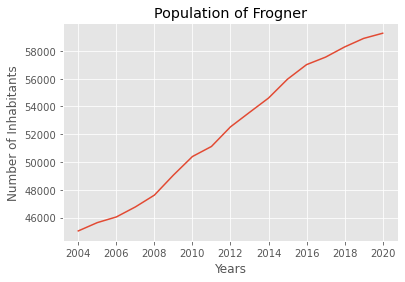

In [162]:
frogner = df_tot.loc['Frogner', all_years]
frogner.plot(kind = 'line')
plt.title('Population of Frogner')
plt.xlabel('Years')
plt.ylabel('Number of Inhabitants')
plt.show()

In [163]:
df_tot.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Borough,,,,,,,,,,,,,,,,,
Gamle Oslo,34579.0,35431.0,36557.0,37717.0,39500.0,41452.0,42569.0,43770.0,44958.0,46290.0,48417.0,49854.0,51444.0,53241.0,54575.0,55683.0,58671.0
Grünerløkka,36779.0,37774.0,38946.0,40406.0,42129.0,43961.0,45647.0,47256.0,49307.0,50507.0,52198.0,54701.0,56283.0,57567.0,58906.0,60844.0,62423.0
Sagene,28816.0,29654.0,30414.0,31428.0,32394.0,33631.0,34286.0,35115.0,35990.0,37053.0,38637.0,39918.0,41566.0,42442.0,43131.0,43801.0,45089.0
St. Hanshaugen,26728.0,27619.0,28287.0,29082.0,30144.0,31550.0,32254.0,33137.0,34109.0,34982.0,35630.0,36218.0,37263.0,37849.0,38109.0,38400.0,38945.0
Frogner,45042.0,45640.0,46047.0,46768.0,47618.0,49058.0,50396.0,51120.0,52531.0,53573.0,54604.0,55965.0,57010.0,57551.0,58283.0,58897.0,59269.0


In [164]:
df_tot['Total Increase'] = df_tot['2020'] - df_tot['2004']
df_tot.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase
Borough,,,,,,,,,,,,,,,,,,
Gamle Oslo,34579.0,35431.0,36557.0,37717.0,39500.0,41452.0,42569.0,43770.0,44958.0,46290.0,48417.0,49854.0,51444.0,53241.0,54575.0,55683.0,58671.0,24092.0
Grünerløkka,36779.0,37774.0,38946.0,40406.0,42129.0,43961.0,45647.0,47256.0,49307.0,50507.0,52198.0,54701.0,56283.0,57567.0,58906.0,60844.0,62423.0,25644.0
Sagene,28816.0,29654.0,30414.0,31428.0,32394.0,33631.0,34286.0,35115.0,35990.0,37053.0,38637.0,39918.0,41566.0,42442.0,43131.0,43801.0,45089.0,16273.0
St. Hanshaugen,26728.0,27619.0,28287.0,29082.0,30144.0,31550.0,32254.0,33137.0,34109.0,34982.0,35630.0,36218.0,37263.0,37849.0,38109.0,38400.0,38945.0,12217.0
Frogner,45042.0,45640.0,46047.0,46768.0,47618.0,49058.0,50396.0,51120.0,52531.0,53573.0,54604.0,55965.0,57010.0,57551.0,58283.0,58897.0,59269.0,14227.0


In [167]:
df_tot.sort_values(by='Total Increase', ascending = False, inplace = True)
df_tot.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase
Borough,,,,,,,,,,,,,,,,,,
Grünerløkka,36779.0,37774.0,38946.0,40406.0,42129.0,43961.0,45647.0,47256.0,49307.0,50507.0,52198.0,54701.0,56283.0,57567.0,58906.0,60844.0,62423.0,25644.0
Gamle Oslo,34579.0,35431.0,36557.0,37717.0,39500.0,41452.0,42569.0,43770.0,44958.0,46290.0,48417.0,49854.0,51444.0,53241.0,54575.0,55683.0,58671.0,24092.0
Sagene,28816.0,29654.0,30414.0,31428.0,32394.0,33631.0,34286.0,35115.0,35990.0,37053.0,38637.0,39918.0,41566.0,42442.0,43131.0,43801.0,45089.0,16273.0
Frogner,45042.0,45640.0,46047.0,46768.0,47618.0,49058.0,50396.0,51120.0,52531.0,53573.0,54604.0,55965.0,57010.0,57551.0,58283.0,58897.0,59269.0,14227.0
St. Hanshaugen,26728.0,27619.0,28287.0,29082.0,30144.0,31550.0,32254.0,33137.0,34109.0,34982.0,35630.0,36218.0,37263.0,37849.0,38109.0,38400.0,38945.0,12217.0


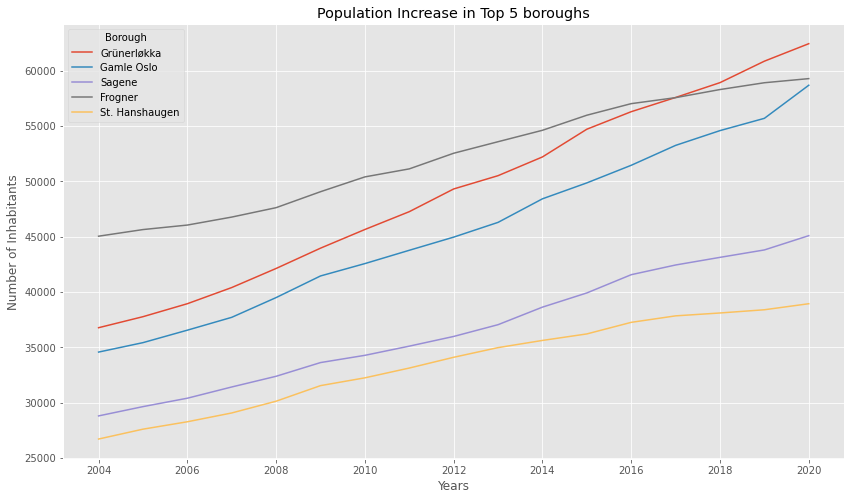

In [170]:
df_top5 = df_tot.head(5)
df_top5 = df_top5[all_years].transpose()
df_top5.plot(kind = 'line', figsize = (14, 8))
plt.title('Population Increase in Top 5 boroughs')
plt.ylabel('Number of Inhabitants')
plt.xlabel('Years')
plt.show()

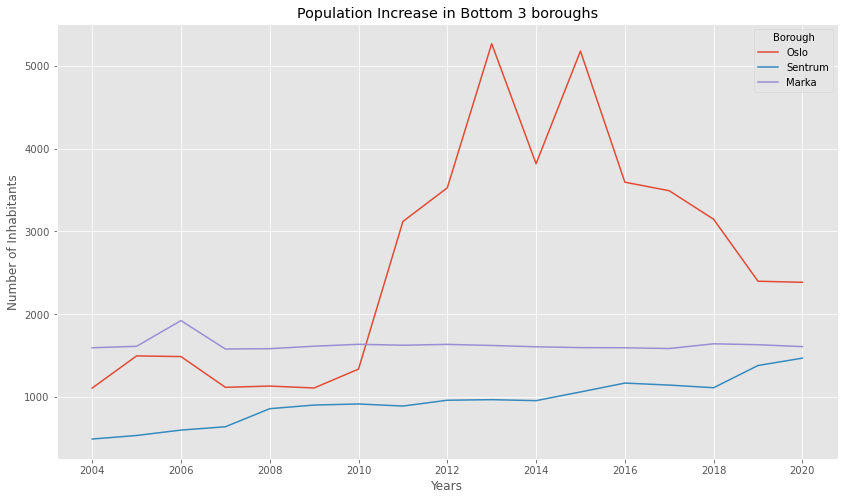

In [179]:
df_bottom5 = df_tot.tail(3)
df_bottom5 = df_bottom5[all_years].transpose()
df_bottom5.plot(kind = 'line', figsize = (14, 8))
plt.title('Population Increase in Bottom 3 boroughs')
plt.ylabel('Number of Inhabitants')
plt.xlabel('Years')
plt.show()

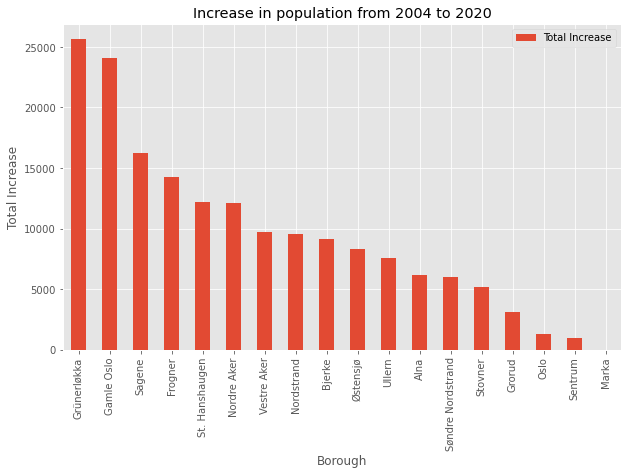

In [187]:
df_increase = df_tot[['Total Increase']]
df_increase.head()

df_increase.plot(kind = 'bar', figsize = (10,6))
                 
plt.title('Increase in population from 2004 to 2020')                
plt.xlabel('Borough') 
plt.ylabel('Total Increase') 
 

plt.show()

### Section Conclusions
From the plotted dependancies we can clearly state, that all of the districts experianced the population growth within the last 16 years, with the largest growth - the district of Grunerlokka, reaching over 25 000 increase in inhabitants.

### Location Data API
In this section we attend to collect the location data of all district. We will connect to the Position Stack open source API, and search the JSON file for the latitude and longitude information. 

This is demonstrated in the capitol city example, and further looped over all of the districts, while storing the information in various list, just before appending the values to the overall dataframe.

In [200]:
import http.client, urllib.parse
url = 'http://api.positionstack.com/v1/forward'

params = urllib.parse.urlencode({
    'access_key': '######',
    'query': 'Oslo',
    'region': 'Oslo',
    'limit': 1,
    'output': 'json' 
    })
resp = requests.get(url = url, params = params)
data = resp.json()

print((float(data['data'][0]['latitude'])))
print((float(data['data'][0]['longitude'])))
print((data['data'][0]['name']))

#print('')

print(data)

59.974453
10.735045
Oslo
{'data': [{'latitude': 59.974453, 'longitude': 10.735045, 'type': 'locality', 'name': 'Oslo', 'number': None, 'postal_code': None, 'street': None, 'confidence': 1, 'region': 'Oslo', 'region_code': 'OS', 'county': None, 'locality': 'Oslo', 'administrative_area': 'Oslo', 'neighbourhood': None, 'country': 'Norway', 'country_code': 'NOR', 'continent': 'Europe', 'label': 'Oslo, Norway'}]}


In [203]:
df_tot.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase
Borough,,,,,,,,,,,,,,,,,,
Grünerløkka,36779.0,37774.0,38946.0,40406.0,42129.0,43961.0,45647.0,47256.0,49307.0,50507.0,52198.0,54701.0,56283.0,57567.0,58906.0,60844.0,62423.0,25644.0
Gamle Oslo,34579.0,35431.0,36557.0,37717.0,39500.0,41452.0,42569.0,43770.0,44958.0,46290.0,48417.0,49854.0,51444.0,53241.0,54575.0,55683.0,58671.0,24092.0
Sagene,28816.0,29654.0,30414.0,31428.0,32394.0,33631.0,34286.0,35115.0,35990.0,37053.0,38637.0,39918.0,41566.0,42442.0,43131.0,43801.0,45089.0,16273.0
Frogner,45042.0,45640.0,46047.0,46768.0,47618.0,49058.0,50396.0,51120.0,52531.0,53573.0,54604.0,55965.0,57010.0,57551.0,58283.0,58897.0,59269.0,14227.0
St. Hanshaugen,26728.0,27619.0,28287.0,29082.0,30144.0,31550.0,32254.0,33137.0,34109.0,34982.0,35630.0,36218.0,37263.0,37849.0,38109.0,38400.0,38945.0,12217.0


In [235]:

df_tot = df_tot.reset_index(level = 'Borough')

In [238]:
import http.client, urllib.parse

url = 'http://api.positionstack.com/v1/forward'
lat= []
long= []
borough_list = []
borough_problem = []


for borough in df_tot['Borough']:
    try:
        params = urllib.parse.urlencode({
        'access_key': '####',
        'query': borough,
        'region': 'Oslo',
        'limit': 1,
        'output': 'json' 
        })
    
        resp = requests.get(url = url, params = params)
        data = resp.json()
    
        lat.append(float(data['data'][0]['latitude']))
        long.append(float(data['data'][0]['longitude']))
        borough_list.append(borough)
        
    except:
        borough_problem.append(index)
        print('This borough is making trouble:', borough)
    

In [245]:

#run this code to gather all the problematic boroughs, if any

for problem_borough in borough_list:
    try:
        params = urllib.parse.urlencode({
        'access_key': '####',
        'query': problem_borough,
        'region': 'Oslo',
        'limit': 1,
        'output': 'json' 
        })
    
        resp = requests.get(url = url, params = params)
        data = resp.json()
    
        lat.append(float(data['data'][0]['latitude']))
        long.append(float(data['data'][0]['longitude']))
        borough_list.append(borough)
    except:
        print('This borough is still making trouble:', problem_borough)


"#run this code to gather all the problematic boroughs, if any\n\nfor problem_borough in borough_list:\n    try:\n        params = urllib.parse.urlencode({\n        'access_key': '37a260105a67b63f2cbd582bdb453638',\n        'query': problem_borough,\n        'region': 'Oslo',\n        'limit': 1,\n        'output': 'json' \n        })\n    \n        resp = requests.get(url = url, params = params)\n        data = resp.json()\n    \n        lat.append(float(data['data'][0]['latitude']))\n        long.append(float(data['data'][0]['longitude']))\n        borough_list.append(borough)\n    except:\n        print('This borough is still making trouble:', problem_borough)\n"

In [239]:
len(long)

18

In [240]:
len(lat)

18

In [241]:
borough_list

['Grünerløkka',
 'Gamle Oslo',
 'Sagene',
 'Frogner',
 'St. Hanshaugen',
 'Nordre Aker',
 'Vestre Aker',
 'Nordstrand',
 'Bjerke',
 'Østensjø',
 'Ullern',
 'Alna',
 'Søndre Nordstrand',
 'Stovner',
 'Grorud',
 'Oslo',
 'Sentrum',
 'Marka']

In [242]:
borough_problem

[]

In [246]:
df_tot.insert(1, 'Latitude', lat, True)
df_tot.insert(1, 'Longitude', long, True)
df_tot

,Borough,Longitude,Latitude,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase
0,Grünerløkka,10.757593,59.923269,36779.0,37774.0,38946.0,40406.0,42129.0,43961.0,45647.0,47256.0,49307.0,50507.0,52198.0,54701.0,56283.0,57567.0,58906.0,60844.0,62423.0,25644.0
1,Gamle Oslo,10.769130,59.907121,34579.0,35431.0,36557.0,37717.0,39500.0,41452.0,42569.0,43770.0,44958.0,46290.0,48417.0,49854.0,51444.0,53241.0,54575.0,55683.0,58671.0,24092.0
2,Sagene,10.753070,59.937650,28816.0,29654.0,30414.0,31428.0,32394.0,33631.0,34286.0,35115.0,35990.0,37053.0,38637.0,39918.0,41566.0,42442.0,43131.0,43801.0,45089.0,16273.0
3,Frogner,10.704321,59.921979,45042.0,45640.0,46047.0,46768.0,47618.0,49058.0,50396.0,51120.0,52531.0,53573.0,54604.0,55965.0,57010.0,57551.0,58283.0,58897.0,59269.0,14227.0
4,St. Hanshaugen,10.738939,59.929714,26728.0,27619.0,28287.0,29082.0,30144.0,31550.0,32254.0,33137.0,34109.0,34982.0,35630.0,36218.0,37263.0,37849.0,38109.0,38400.0,38945.0,12217.0
5,Nordre Aker,10.767097,59.951045,40235.0,41060.0,41656.0,42692.0,43843.0,45024.0,46287.0,47433.0,48432.0,48413.0,48720.0,49337.0,49781.0,50224.0,50724.0,51558.0,52327.0,12092.0
6,Vestre Aker,10.729296,59.936652,40424.0,40587.0,40878.0,41302.0,42042.0,42756.0,43457.0,44320.0,45186.0,45715.0,46444.0,47024.0,47885.0,48229.0,48605.0,49153.0,50157.0,9733.0
7,Nordstrand,10.790450,59.863766,42939.0,43297.0,43824.0,44423.0,44802.0,45710.0,46419.0,46888.0,47696.0,48347.0,48931.0,49428.0,50082.0,50645.0,51169.0,51882.0,52459.0,9520.0
8,Bjerke,10.860322,59.888726,24256.0,24448.0,24606.0,25530.0,26229.0,26863.0,27632.0,28226.0,29090.0,29617.0,30327.0,30502.0,30937.0,31510.0,31973.0,32500.0,33422.0,9166.0
9,Østensjø,10.831376,59.899335,42484.0,42681.0,43547.0,44036.0,44399.0,45042.0,45577.0,46244.0,47164.0,47806.0,48714.0,49133.0,49821.0,49973.0,49968.0,50427.0,50806.0,8322.0


In [247]:
#correct the coordinates for Bjerke area
df_tot.at[8, 'Latitude'] = 59.9411
df_tot.at[8, 'Longitude'] = 10.8199
df_tot

,Borough,Longitude,Latitude,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase
0,Grünerløkka,10.757593,59.923269,36779.0,37774.0,38946.0,40406.0,42129.0,43961.0,45647.0,47256.0,49307.0,50507.0,52198.0,54701.0,56283.0,57567.0,58906.0,60844.0,62423.0,25644.0
1,Gamle Oslo,10.769130,59.907121,34579.0,35431.0,36557.0,37717.0,39500.0,41452.0,42569.0,43770.0,44958.0,46290.0,48417.0,49854.0,51444.0,53241.0,54575.0,55683.0,58671.0,24092.0
2,Sagene,10.753070,59.937650,28816.0,29654.0,30414.0,31428.0,32394.0,33631.0,34286.0,35115.0,35990.0,37053.0,38637.0,39918.0,41566.0,42442.0,43131.0,43801.0,45089.0,16273.0
3,Frogner,10.704321,59.921979,45042.0,45640.0,46047.0,46768.0,47618.0,49058.0,50396.0,51120.0,52531.0,53573.0,54604.0,55965.0,57010.0,57551.0,58283.0,58897.0,59269.0,14227.0
4,St. Hanshaugen,10.738939,59.929714,26728.0,27619.0,28287.0,29082.0,30144.0,31550.0,32254.0,33137.0,34109.0,34982.0,35630.0,36218.0,37263.0,37849.0,38109.0,38400.0,38945.0,12217.0
5,Nordre Aker,10.767097,59.951045,40235.0,41060.0,41656.0,42692.0,43843.0,45024.0,46287.0,47433.0,48432.0,48413.0,48720.0,49337.0,49781.0,50224.0,50724.0,51558.0,52327.0,12092.0
6,Vestre Aker,10.729296,59.936652,40424.0,40587.0,40878.0,41302.0,42042.0,42756.0,43457.0,44320.0,45186.0,45715.0,46444.0,47024.0,47885.0,48229.0,48605.0,49153.0,50157.0,9733.0
7,Nordstrand,10.790450,59.863766,42939.0,43297.0,43824.0,44423.0,44802.0,45710.0,46419.0,46888.0,47696.0,48347.0,48931.0,49428.0,50082.0,50645.0,51169.0,51882.0,52459.0,9520.0
8,Bjerke,10.819900,59.941100,24256.0,24448.0,24606.0,25530.0,26229.0,26863.0,27632.0,28226.0,29090.0,29617.0,30327.0,30502.0,30937.0,31510.0,31973.0,32500.0,33422.0,9166.0
9,Østensjø,10.831376,59.899335,42484.0,42681.0,43547.0,44036.0,44399.0,45042.0,45577.0,46244.0,47164.0,47806.0,48714.0,49133.0,49821.0,49973.0,49968.0,50427.0,50806.0,8322.0


### Visualization of the Districts
Here we use the collected geographical information, and fetch it in a for loop via a folium plotting library to generate the map of the city with its all districts.

In [248]:
# create map of Oslo using latitude and longitude values
latitude = df_tot.at[15, 'Latitude']
longitude = df_tot.at[15, 'Longitude']

map_oslo = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_tot['Latitude'], df_tot['Longitude'], df_tot['Borough']):
    label = borough
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_oslo)  
    
map_oslo

In [249]:
neighborhood_latitude = df_tot.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_tot.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_tot.loc[0, 'Borough'] # borough name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Grünerløkka are 59.923269, 10.757593.


### Foursquere API
Here we connect to the Foursquere API and collect the necesarry data about each of the districts and it's venues. We use the radius of 1.5 km for each district! First, we demonstrate the data collection for one case, and later we automatate the data collection and data storage via a for loop.

In [ ]:
CLIENT_ID = '###' # your Foursquare ID
CLIENT_SECRET = '###' # your Foursquare Secret
VERSION = '20201212' # Foursquare API version
VERSION_OLD = '20040101'
LIMIT = 100 # limit of number of venues returned by Foursquare API

#radius = 500
radius_1 = 1500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius_1, 
    LIMIT)
url 

In [254]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6004cbc6d040043198b4d7b5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Grünerløkka øst',
  'headerFullLocation': 'Grünerløkka øst, Oslo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 195,
  'suggestedBounds': {'ne': {'lat': 59.93676901350001,
    'lng': 10.784480271883657},
   'sw': {'lat': 59.909768986499984, 'lng': 10.730705728116343}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b51e2f1f964a520b75927e3',
       'name': 'Tim Wendelboe',
       'location': {'address': 'Grüners gate 1',
        'crossStreet': 'Fossveien',
        'lat': 59.92339298267918,
        'lng': 10.75549359682346,
        'labeledLatLngs': [

In [ ]:
CLIENT_ID = '###' # your Foursquare ID
CLIENT_SECRET = '###' # your Foursquare Secret
VERSION = '20201212' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500
radius_1 = 1500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION_OLD, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius_1, 
    LIMIT)
url 

In [256]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [257]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tim Wendelboe,Coffee Shop,59.923393,10.755494
1,Focacceria,Italian Restaurant,59.923632,10.757336
2,Grünerløkka Brygghus,Pub,59.925018,10.759250
3,Bon Lio,Spanish Restaurant,59.922238,10.761378
4,Godt Brød,Bakery,59.923942,10.759213


In [258]:
nearby_venues.shape

(100, 4)

In [259]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius_1, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [260]:
oslo_venues = getNearbyVenues(names=df_tot['Borough'],
                                   latitudes=df_tot['Latitude'],
                                   longitudes=df_tot['Longitude']
                                  )

Grünerløkka
Gamle Oslo
Sagene
Frogner
St. Hanshaugen
Nordre Aker
Vestre Aker
Nordstrand
Bjerke
Østensjø
Ullern
Alna
Søndre Nordstrand
Stovner
Grorud
Oslo
Sentrum
Marka


In [261]:
print(oslo_venues.shape)
oslo_venues.tail()

(984, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
979,Marka,59.97954,10.73982,Sognsvann Rundt Medsols,59.970061,10.730214,Athletics & Sports
980,Marka,59.97954,10.73982,Sognsvannkiosken,59.969221,10.731813,Candy Store
981,Marka,59.97954,10.73982,Toppidrettsenteret,59.968295,10.732104,Gym
982,Marka,59.97954,10.73982,Olympiatoppen Sportshotel,59.968127,10.731637,Hotel
983,Marka,59.97954,10.73982,Sognsvann (T),59.967280,10.733798,Metro Station


In [262]:
print('There are {} uniques categories.'.format(len(oslo_venues['Venue Category'].unique())))

There are 151 uniques categories.


### Result of the section
We can clearly see, that we have collected some data for each of the districts, with 151 unique categories, and overall our dataset contains 984 venues!

### Clustering of the Disctricts
In this section, we attempt to perfrom the k-means clustering, depending on the variability of the venues of each district.

Firstly, we perform a technique of 'one hot encoding' in order to numerically represent our cathegorical variables. Later, we group them by the occurancy frequency in each neighborhood, and finally we model the data, using the 5 default cluster for our model.

In [263]:
# one hot encoding
oslo_onehot = pd.get_dummies(oslo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
oslo_onehot['Neighborhood'] = oslo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [oslo_onehot.columns[-1]] + list(oslo_onehot.columns[:-1])
oslo_onehot = oslo_onehot[fixed_columns]

oslo_onehot.head()

,Neighborhood,Advertising Agency,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bar,Bathing Area,Beach,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Camera Store,Candy Store,Cemetery,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dog Run,Dumpling Restaurant,Electronics Store,Escape Room,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,History Museum,Hockey Field,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Laser Tag,Light Rail Station,Market,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Movie Theater,Moving Target,Multiplex,Music Venue,Nature Preserve,Nightclub,Opera House,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Ski Area,Smoothie Shop,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Grünerløkka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Grünerløkka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Grünerløkka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grünerløkka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Grünerløkka,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [264]:
oslo_onehot.shape

(984, 152)

In [265]:
oslo_grouped = oslo_onehot.groupby('Neighborhood').mean().reset_index()
oslo_grouped

,Neighborhood,Advertising Agency,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bar,Bathing Area,Beach,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Camera Store,Candy Store,Cemetery,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dog Run,Dumpling Restaurant,Electronics Store,Escape Room,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,History Museum,Hockey Field,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Laser Tag,Light Rail Station,Market,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Movie Theater,Moving Target,Multiplex,Music Venue,Nature Preserve,Nightclub,Opera House,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Ski Area,Smoothie Shop,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Alna,0.000000,0.00,0.00,0.00,0.027027,0.000000,0.000000,0.027027,0.027027,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.027027,0.00,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.027027,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.027027,0.00,0.00,0.00,0.054054,0.00,0.00,0.00,0.000000,0.00,0.027027,0.000000,0.027027,0.00,0.00,0.00,0.00,0.00,0.135135,0.00,0.027027,0.000000,0.00,0.00,0.000000,0.135135,0.000000,0.027027,0.000000,0.00,0.00,0.00,0.000000,0.00,0.054054,0.027027,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.027027,0.027027,0.00,0.00,0.00,0.000000,0.027027,0.00,0.00,0.027027,0.00,0.00,0.00,0.027027,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.027027,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.027027,0.00,0.027027,0.000,0.00,0.027027,0.027027,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.027027,0.00,0.00,0.00,0.00,0.027027,0.00,0.00
1,Bjerke,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00000,0.000000,0.00,0.076923,0.000000,0.00,0.076923,0.00,0.000000,0.00,0.038462,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.038462,0.00,0.038462,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.192308,0.000000,0.038462,0.000000,0.00,0.00,0.00,0.000000,0.00,0.076923,0.038462,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.038462,0.000000,0.00,0.000000,0.076923,0.000000,0.000000,0.00,0.038462,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.038462,0.00000

In [266]:
oslo_grouped.shape

(18, 152)

In [267]:
num_top_venues = 5

for hood in oslo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = oslo_grouped[oslo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alna----
                    venue  freq
0           Grocery Store  0.14
1  Furniture / Home Store  0.14
2       Electronics Store  0.05
3                   Hotel  0.05
4      Spanish Restaurant  0.03


----Bjerke----
           venue  freq
0  Grocery Store  0.19
1    Bus Station  0.08
2           Café  0.08
3          Hotel  0.08
4    Supermarket  0.08


----Frogner----
                     venue  freq
0     Gym / Fitness Center  0.07
1              Coffee Shop  0.06
2                    Hotel  0.05
3  Scandinavian Restaurant  0.05
4                   Bakery  0.04


----Gamle Oslo----
               venue  freq
0                Bar  0.11
1        Coffee Shop  0.08
2  Indian Restaurant  0.05
3               Café  0.04
4       Cocktail Bar  0.03


----Grorud----
                  venue  freq
0         Grocery Store  0.19
1         Metro Station  0.12
2           Supermarket  0.09
3     Convenience Store  0.09
4  Fast Food Restaurant  0.06


----Grünerløkka----
         venue  freq
0

In [268]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [272]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = oslo_grouped['Neighborhood']

for ind in np.arange(oslo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(oslo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alna,Furniture / Home Store,Grocery Store,Electronics Store,Hotel,Racetrack,Supermarket,Metro Station,Market,Café,Fast Food Restaurant
1,Bjerke,Grocery Store,Pizza Place,Hotel,Bus Station,Supermarket,Café,Fast Food Restaurant,Chinese Restaurant,Farm,Shopping Mall
2,Frogner,Gym / Fitness Center,Coffee Shop,Scandinavian Restaurant,Hotel,Grocery Store,Café,Italian Restaurant,Park,Bakery,Asian Restaurant
3,Gamle Oslo,Bar,Coffee Shop,Indian Restaurant,Café,Scandinavian Restaurant,Hotel,Park,Cocktail Bar,Tapas Restaurant,Scenic Lookout
4,Grorud,Grocery Store,Metro Station,Supermarket,Convenience Store,Train Station,Athletics & Sports,Fast Food Restaurant,Pizza Place,Pharmacy,Bus Station
5,Grünerløkka,Coffee Shop,Park,Bar,Café,Bakery,Indian Restaurant,Cocktail Bar,Grocery Store,Hotel,Bookstore
6,Marka,Candy Store,Hotel,Gym,Athletics & Sports,Metro Station,Lake,Escape Room,Fish Market,Fast Food Restaurant,Farmers Market
7,Nordre Aker,Grocery Store,Sushi Restaurant,Bakery,Gym,Light Rail Station,Coffee Shop,Shopping Mall,Café,Pizza Place,Soccer Stadium
8,Nordstrand,Grocery Store,Beach,Fast Food Restaurant,Train Station,Shopping Mall,Bus Station,Supermarket,Juice Bar,Bakery,Soccer Field
9,Oslo,Lake,Soccer Field,Stadium,Gym,Grocery Store,Athletics & Sports,Candy Store,Zoo Exhibit,Escape Room,Farmers Market


In [273]:
# set number of clusters
kclusters = 5

oslo_grouped_clustering = oslo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(oslo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 0, 1, 0, 2, 0, 1, 4])

In [274]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



In [276]:
oslo_merged = df_area


oslo_merged = oslo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

oslo_merged = oslo_merged.drop(columns = ['Number'])
oslo_merged.head()




,Borough,Residents,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gamle Oslo,58 671,"7,5 km2",0,Bar,Coffee Shop,Indian Restaurant,Café,Scandinavian Restaurant,Hotel,Park,Cocktail Bar,Tapas Restaurant,Scenic Lookout
1,Grünerløkka,62 423,"4,8 km2",0,Coffee Shop,Park,Bar,Café,Bakery,Indian Restaurant,Cocktail Bar,Grocery Store,Hotel,Bookstore
2,Sagene,45 089,"3,1 km2",0,Bakery,Sushi Restaurant,Bar,Park,Café,Coffee Shop,Gym / Fitness Center,Indian Restaurant,Pizza Place,Cocktail Bar
3,St. Hanshaugen,38 945,"3,6 km2",0,Bakery,Café,Coffee Shop,Park,Pizza Place,Clothing Store,Pub,Grocery Store,Asian Restaurant,Gym / Fitness Center
4,Frogner,59 269,"8,3 km2",0,Gym / Fitness Center,Coffee Shop,Scandinavian Restaurant,Hotel,Grocery Store,Café,Italian Restaurant,Park,Bakery,Asian Restaurant


In [312]:
oslo_merged

,Borough,Residents,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gamle Oslo,58 671,"7,5 km2",0,Bar,Coffee Shop,Indian Restaurant,Café,Scandinavian Restaurant,Hotel,Park,Cocktail Bar,Tapas Restaurant,Scenic Lookout
1,Grünerløkka,62 423,"4,8 km2",0,Coffee Shop,Park,Bar,Café,Bakery,Indian Restaurant,Cocktail Bar,Grocery Store,Hotel,Bookstore
2,Sagene,45 089,"3,1 km2",0,Bakery,Sushi Restaurant,Bar,Park,Café,Coffee Shop,Gym / Fitness Center,Indian Restaurant,Pizza Place,Cocktail Bar
3,St. Hanshaugen,38 945,"3,6 km2",0,Bakery,Café,Coffee Shop,Park,Pizza Place,Clothing Store,Pub,Grocery Store,Asian Restaurant,Gym / Fitness Center
4,Frogner,59 269,"8,3 km2",0,Gym / Fitness Center,Coffee Shop,Scandinavian Restaurant,Hotel,Grocery Store,Café,Italian Restaurant,Park,Bakery,Asian Restaurant
5,Ullern,34 596,"9,4 km2",1,Bus Station,Metro Station,Grocery Store,Coffee Shop,Market,Light Rail Station,Italian Restaurant,Flower Shop,Juice Bar,Burger Joint
6,Vestre Aker,50 157,"16,6 km2",0,Bakery,Café,Coffee Shop,Gym / Fitness Center,Pub,Sushi Restaurant,Bar,Pizza Place,Park,Clothing Store
7,Nordre Aker,52 327,"13,6 km2",0,Grocery Store,Sushi Restaurant,Bakery,Gym,Light Rail Station,Coffee Shop,Shopping Mall,Café,Pizza Place,Soccer Stadium
8,Bjerke,33 422,"7,7 km2",1,Grocery Store,Pizza Place,Hotel,Bus Station,Supermarket,Café,Fast Food Restaurant,Chinese Restaurant,Farm,Shopping Mall
9,Grorud,27 707,"8,2 km2",1,Grocery Store,Metro Station,Supermarket,Convenience Store,Train Station,Athletics & Sports,Fast Food Restaurant,Pizza Place,Pharmacy,Bus Station


In [279]:
# merge oslo_grouped_1 with df_tot dataframe to add latitude/longitude for each neighborhood
oslo_merged_1 = df_tot

# merge oslo_grouped with downtown dataframe to add latitude/longitude for each neighborhood
oslo_merged_1 = oslo_merged_1.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')


oslo_merged_1.tail()

,Borough,Longitude,Latitude,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Stovner,10.935036,59.954940,28109.0,28445.0,28656.0,28936.0,29351.0,29651.0,29746.0,30178.0,30554.0,30752.0,31340.0,31669.0,32153.0,32527.0,32850.0,32909.0,33316.0,5207.0,1,Grocery Store,Department Store,Bus Station,Furniture / Home Store,Plaza,Athletics & Sports,Pharmacy,Shopping Mall,Laser Tag,Zoo Exhibit
14,Grorud,10.889640,59.950877,24617.0,24729.0,25032.0,25359.0,25461.0,26020.0,26074.0,26291.0,26777.0,26888.0,27101.0,27283.0,27419.0,27566.0,27525.0,27583.0,27707.0,3090.0,1,Grocery Store,Metro Station,Supermarket,Convenience Store,Train Station,Athletics & Sports,Fast Food Restaurant,Pizza Place,Pharmacy,Bus Station
15,Oslo,10.735045,59.974453,1110.0,1498.0,1490.0,1119.0,1134.0,1111.0,1339.0,3120.0,3526.0,5265.0,3817.0,5176.0,3594.0,3491.0,3147.0,2399.0,2386.0,1276.0,4,Lake,Soccer Field,Stadium,Gym,Grocery Store,Athletics & Sports,Candy Store,Zoo Exhibit,Escape Room,Farmers Market
16,Sentrum,10.742081,59.916479,495.0,538.0,603.0,643.0,861.0,905.0,918.0,893.0,963.0,970.0,958.0,1063.0,1170.0,1146.0,1114.0,1382.0,1471.0,976.0,0,Hotel,Coffee Shop,Bar,Food Court,Restaurant,Scandinavian Restaurant,Music Venue,Bookstore,Cocktail Bar,Indian Restaurant
17,Marka,10.739820,59.979540,1596.0,1614.0,1924.0,1581.0,1585.0,1615.0,1638.0,1627.0,1637.0,1624.0,1608.0,1598.0,1596.0,1587.0,1644.0,1633.0,1610.0,14.0,2,Candy Store,Hotel,Gym,Athletics & Sports,Metro Station,Lake,Escape Room,Fish Market,Fast Food Restaurant,Farmers Market


In [297]:
oslo_merged_1

,Borough,Longitude,Latitude,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Grünerløkka,10.757593,59.923269,36779.0,37774.0,38946.0,40406.0,42129.0,43961.0,45647.0,47256.0,49307.0,50507.0,52198.0,54701.0,56283.0,57567.0,58906.0,60844.0,62423.0,25644.0,0,Coffee Shop,Park,Bar,Café,Bakery,Indian Restaurant,Cocktail Bar,Grocery Store,Hotel,Bookstore
1,Gamle Oslo,10.769130,59.907121,34579.0,35431.0,36557.0,37717.0,39500.0,41452.0,42569.0,43770.0,44958.0,46290.0,48417.0,49854.0,51444.0,53241.0,54575.0,55683.0,58671.0,24092.0,0,Bar,Coffee Shop,Indian Restaurant,Café,Scandinavian Restaurant,Hotel,Park,Cocktail Bar,Tapas Restaurant,Scenic Lookout
2,Sagene,10.753070,59.937650,28816.0,29654.0,30414.0,31428.0,32394.0,33631.0,34286.0,35115.0,35990.0,37053.0,38637.0,39918.0,41566.0,42442.0,43131.0,43801.0,45089.0,16273.0,0,Bakery,Sushi Restaurant,Bar,Park,Café,Coffee Shop,Gym / Fitness Center,Indian Restaurant,Pizza Place,Cocktail Bar
3,Frogner,10.704321,59.921979,45042.0,45640.0,46047.0,46768.0,47618.0,49058.0,50396.0,51120.0,52531.0,53573.0,54604.0,55965.0,57010.0,57551.0,58283.0,58897.0,59269.0,14227.0,0,Gym / Fitness Center,Coffee Shop,Scandinavian Restaurant,Hotel,Grocery Store,Café,Italian Restaurant,Park,Bakery,Asian Restaurant
4,St. Hanshaugen,10.738939,59.929714,26728.0,27619.0,28287.0,29082.0,30144.0,31550.0,32254.0,33137.0,34109.0,34982.0,35630.0,36218.0,37263.0,37849.0,38109.0,38400.0,38945.0,12217.0,0,Bakery,Café,Coffee Shop,Park,Pizza Place,Clothing Store,Pub,Grocery Store,Asian Restaurant,Gym / Fitness Center
5,Nordre Aker,10.767097,59.951045,40235.0,41060.0,41656.0,42692.0,43843.0,45024.0,46287.0,47433.0,48432.0,48413.0,48720.0,49337.0,49781.0,50224.0,50724.0,51558.0,52327.0,12092.0,0,Grocery Store,Sushi Restaurant,Bakery,Gym,Light Rail Station,Coffee Shop,Shopping Mall,Café,Pizza Place,Soccer Stadium
6,Vestre Aker,10.729296,59.936652,40424.0,40587.0,40878.0,41302.0,42042.0,42756.0,43457.0,44320.0,45186.0,45715.0,46444.0,47024.0,47885.0,48229.0,48605.0,49153.0,50157.0,9733.0,0,Bakery,Café,Coffee Shop,Gym / Fitness Center,Pub,Sushi Restaurant,Bar,Pizza Place,Park,Clothing Store
7,Nordstrand,10.790450,59.863766,42939.0,43297.0,43824.0,44423.0,44802.0,45710.0,46419.0,46888.0,47696.0,48347.0,48931.0,49428.0,50082.0,50645.0,51169.0,51882.0,52459.0,9520.0,1,Grocery Store,Beach,Fast Food Restaurant,Train Station,Shopping Mall,Bus Station,Supermarket,Juice Bar,Bakery,Soccer Field
8,Bjerke,10.819900,59.941100,24256.0,24448.0,24606.0,25530.0,26229.0,26863.0,27632.0,28226.0,29090.0,29617.0,30327.0,30502.0,30937.0,31510.0,31973.0,32500.0,33422.0,9166.0,1,Grocery Store,Pizza Place,Hotel,Bus Station,Supermarket,Café,Fast Food Restaurant,Chinese Restaurant,Farm,Shopping Mall
9,Østensjø,10.831376,59.899335,42484.0,42681.0,43547.0,44036.0,44399.0,45042.0,45577.0,46244.0,47164.0,47806.0,48714.0,49133.0,49821.0,49973.0,49968.0,50427.0,50806.0,8322.0,1,Grocery Store,Metro Station,Clothing Store,Sushi Restaurant,Convenience Store,Burger Joint,Farm,Department Store,Train Station,Shopping Mall


In [300]:
oslo_merged_1.value_counts(['Cluster Labels'])

Cluster Labels
0                 8
1                 7
4                 1
3                 1
2                 1
dtype: int64

In [299]:
oslo_merged_1.isnull().values.any()

False

## RESULTS
Finally, we can plot the cluster distribution over the map of the city, and analyse the clusters.

In [301]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(oslo_merged_1['Latitude'], oslo_merged_1['Longitude'], oslo_merged_1['Borough'], oslo_merged_1['Cluster Labels']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster) -1],
        fill=True,
        fill_color=[int(cluster) -1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [310]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 0, oslo_merged.columns[[0] +[1] + list(range(4, oslo_merged.shape[1]))]]

,Borough,Residents,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gamle Oslo,58 671,Bar,Coffee Shop,Indian Restaurant,Café,Scandinavian Restaurant,Hotel,Park,Cocktail Bar,Tapas Restaurant,Scenic Lookout
1,Grünerløkka,62 423,Coffee Shop,Park,Bar,Café,Bakery,Indian Restaurant,Cocktail Bar,Grocery Store,Hotel,Bookstore
2,Sagene,45 089,Bakery,Sushi Restaurant,Bar,Park,Café,Coffee Shop,Gym / Fitness Center,Indian Restaurant,Pizza Place,Cocktail Bar
3,St. Hanshaugen,38 945,Bakery,Café,Coffee Shop,Park,Pizza Place,Clothing Store,Pub,Grocery Store,Asian Restaurant,Gym / Fitness Center
4,Frogner,59 269,Gym / Fitness Center,Coffee Shop,Scandinavian Restaurant,Hotel,Grocery Store,Café,Italian Restaurant,Park,Bakery,Asian Restaurant
6,Vestre Aker,50 157,Bakery,Café,Coffee Shop,Gym / Fitness Center,Pub,Sushi Restaurant,Bar,Pizza Place,Park,Clothing Store
7,Nordre Aker,52 327,Grocery Store,Sushi Restaurant,Bakery,Gym,Light Rail Station,Coffee Shop,Shopping Mall,Café,Pizza Place,Soccer Stadium


In [311]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 1, oslo_merged.columns[[0] +[1] + list(range(4, oslo_merged.shape[1]))]]

,Borough,Residents,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Ullern,34 596,Bus Station,Metro Station,Grocery Store,Coffee Shop,Market,Light Rail Station,Italian Restaurant,Flower Shop,Juice Bar,Burger Joint
8,Bjerke,33 422,Grocery Store,Pizza Place,Hotel,Bus Station,Supermarket,Café,Fast Food Restaurant,Chinese Restaurant,Farm,Shopping Mall
9,Grorud,27 707,Grocery Store,Metro Station,Supermarket,Convenience Store,Train Station,Athletics & Sports,Fast Food Restaurant,Pizza Place,Pharmacy,Bus Station
10,Stovner,33 316,Grocery Store,Department Store,Bus Station,Furniture / Home Store,Plaza,Athletics & Sports,Pharmacy,Shopping Mall,Laser Tag,Zoo Exhibit
11,Alna,49 801,Furniture / Home Store,Grocery Store,Electronics Store,Hotel,Racetrack,Supermarket,Metro Station,Market,Café,Fast Food Restaurant
12,Østensjø,50 806,Grocery Store,Metro Station,Clothing Store,Sushi Restaurant,Convenience Store,Burger Joint,Farm,Department Store,Train Station,Shopping Mall
13,Nordstrand,52 459,Grocery Store,Beach,Fast Food Restaurant,Train Station,Shopping Mall,Bus Station,Supermarket,Juice Bar,Bakery,Soccer Field


In [315]:
oslo_merged_1.loc[oslo_merged_1['Cluster Labels'] == 2, oslo_merged_1.columns[[0] +[1] + list(range(4, oslo_merged_1.shape[1]))]]

,Borough,Longitude,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Marka,10.73982,1614.0,1924.0,1581.0,1585.0,1615.0,1638.0,1627.0,1637.0,1624.0,1608.0,1598.0,1596.0,1587.0,1644.0,1633.0,1610.0,14.0,2,Candy Store,Hotel,Gym,Athletics & Sports,Metro Station,Lake,Escape Room,Fish Market,Fast Food Restaurant,Farmers Market


In [295]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 3, oslo_merged.columns[[0] +[1] + list(range(4, oslo_merged.shape[1]))]]

,Borough,Residents,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Søndre Nordstrand,39 066,Playground,Fast Food Restaurant,Soccer Field,Grocery Store,Trail,Bus Stop,Beach,Bathing Area,Exhibit,Farmers Market


In [314]:
oslo_merged_1.loc[oslo_merged_1['Cluster Labels'] == 4, oslo_merged_1.columns[[0] +[1] + list(range(4, oslo_merged_1.shape[1]))]]

,Borough,Longitude,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Increase,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Oslo,10.735045,1498.0,1490.0,1119.0,1134.0,1111.0,1339.0,3120.0,3526.0,5265.0,3817.0,5176.0,3594.0,3491.0,3147.0,2399.0,2386.0,1276.0,4,Lake,Soccer Field,Stadium,Gym,Grocery Store,Athletics & Sports,Candy Store,Zoo Exhibit,Escape Room,Farmers Market


## DISCUSSION
We can clearly see, that the cities within the city center have much more faster growth of inhabitants, as well a wide selection of caffees, bars and restaurants - definitally a good spot to start a service bussiness - we can call this cluster a enjoyment cluster. 

Whereas the areas outside of the city ceter experience more of the family-like utilities - grocery stores, electro suppliencies - we can call this cluster a necessary cluster.

Our last  clusters each contain only one district - this is due to the significant variance from the main two clusters - Marka, with it's access to a lake,  and eg. the South Nordstand with the access to the beaches, and various playgorunds.

Based on the finding of this report, and tools used, there is a place for an improvement in the future: more data could be colected, in order to investigate more factors for the population growth, or the occurance of specific venues in the area, the regression methods could be used, in order to determine the underlying correlation between the variables, as well as another forms of clustering methonds - for example density- based clustering.

## Conclusions
Overall we can see, that the population is also increasing over the time more, the closer to the first two clusters one finds themselves! This indicates that the more densely populated areas also offer more of the entertinement venues, then the remote areas with less population growth.